# <center>Digital Image Processing - Problem Set 2</center>

### Student Names: Cristian Bossio & Meredith Narváez

### Instructions

This Problem Set covers the topics of Image enhancement in the spatial domain, power law transformations, histogram equalization, smoothing, median filters, image sharpening, Laplacian of an image, image gradients and Sobel operators. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Problem 1

Implement the code for the function below, which runs histogram equalization on a grayscale image. Your code should compute the histogram of the image, and use the cdf as a transformation function. The function should return the equalized image as an array. Use the function to do histogram equalization on the images <tt>darkPollen.jpg</tt>, <tt>lightPollen.jpg</tt>, <tt>lowContrastPollen.jpg</tt>, <tt>pollen.jpg</tt>, <tt>spine.jpg</tt> and <tt>runway.jpg</tt>. Include in the report plots and comparisons between the histograms of the corrected images to those of the originals. Also include a plot of the transformation function that equalizes the input histograms. Please comment your results.

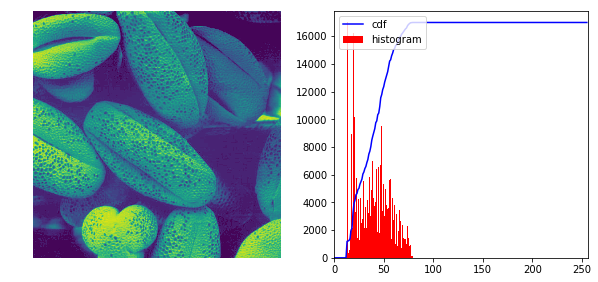

In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('darkPollen.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
plt.figure(figsize=(10,10));
plt.subplot(221),plt.imshow(img);plt.axis('off');

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.subplot(222);
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

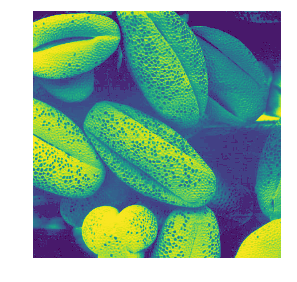

In [116]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[img]
plt.figure(figsize=(10,10));
plt.subplot(221),plt.imshow(img2);plt.axis('off');

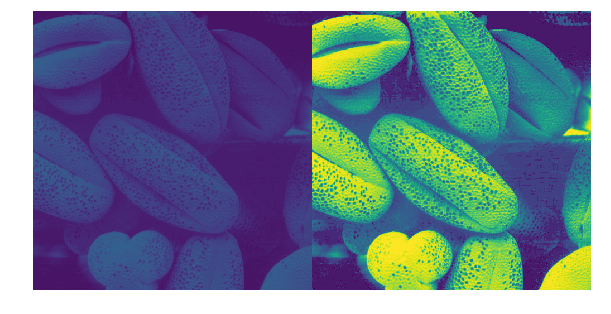

In [120]:
img = cv2.imread('darkPollen.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.figure(figsize=(10,10));plt.imshow(res);plt.axis('off');

Please comment results here.

### Problem 2

Implement the code for the function below which performs a power law transformation on an image. This function should take an image array and the gamma value to be used in the transformation as its only input parameters. The function should return a new image array which is the power transformation of the original image. Power law transformations are achieved using the following formula:
$$ g(x,y) = T[f(x,y)] = c \cdot f(x,y) ^ \gamma $$

where $g(x,y)$ is the output pixel value, $f(x,y)$ is the original pixel value, $\gamma$ is the parameter controlling the power law transformation and $c$ is a constant usually set to 1. Note that you convert the image so that the intensity values are in the range 0.0 – 1.0, rather than in 0 – 255.

Try this new function out on the images <tt>spine.jpg</tt> and <tt>runway.jpg</tt>, experimenting with different values for $\gamma$. Please comment your results.

(Discuss your results after looking at the resulting images)

### Problem 3

Implement a function that performs smoothing on an input image with an averaging filter mask of size $n$. The function should take two inputs: an image matrix and the filter size $n$. Use the image <tt>test_pattern_blurring_orig.tif</tt> to test your algorithm. Use averaging filter masks of sizes $n = 3, 5, 9, 15, 35$. Analyze the results you obtained.

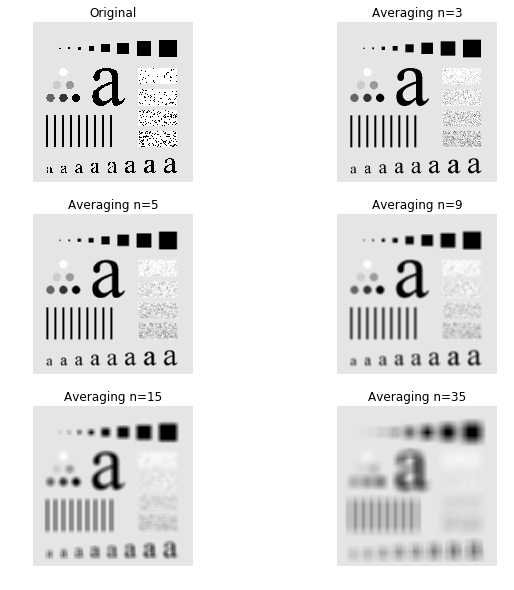

In [52]:
img = cv2.imread("test_pattern_blurring_orig.png") 
def smooth(img,n):
    kernel = np.ones((n,n),np.float32)/(n*n) 
    sm_img = cv2.filter2D(img,-1,kernel)
    return sm_img

imgs1=smooth(img,3)
imgs2=smooth(img,5)
imgs3=smooth(img,9)
imgs4=smooth(img,15)
imgs5=smooth(img,35)
plt.figure(figsize=(10,10));
plt.subplot(321),plt.imshow(img),plt.title('Original')
plt.axis('off');
plt.subplot(322),plt.imshow(imgs1),plt.title('Averaging n=3')
plt.axis('off');
plt.subplot(323),plt.imshow(imgs2),plt.title('Averaging n=5')
plt.axis('off');
plt.subplot(324),plt.imshow(imgs3),plt.title('Averaging n=9')
plt.axis('off');
plt.subplot(325),plt.imshow(imgs4),plt.title('Averaging n=15')
plt.axis('off');
plt.subplot(326),plt.imshow(imgs5),plt.title('Averaging n=35')
plt.axis('off');

### Problem 4

Consider the image <tt>ckt_board_saltpep_prob_pt05.png</tt>. It has been corrupted with ‘salt-and-pepper’ noise (more formally known as impulse noise). Try to remove the noise from this image by applying a median filter of size 3x3. Compare the result to applying an averaging filter of size 3x3.  Increase the kernel size to 3x3, 5x5, 9x9, 15x15 and repeat. Analyze the results you obtained. Did the filter successfully remove the noise? Did you observe any other side effects?

You can also corrupt any image you like with a salt-and-pepper noise generator. Write another function which adds salt-and-pepper noise to an input image. Use that function to corrupt additional images. Try to recover the original images using a median filter of appropriate size.

<b> Solución: </b>

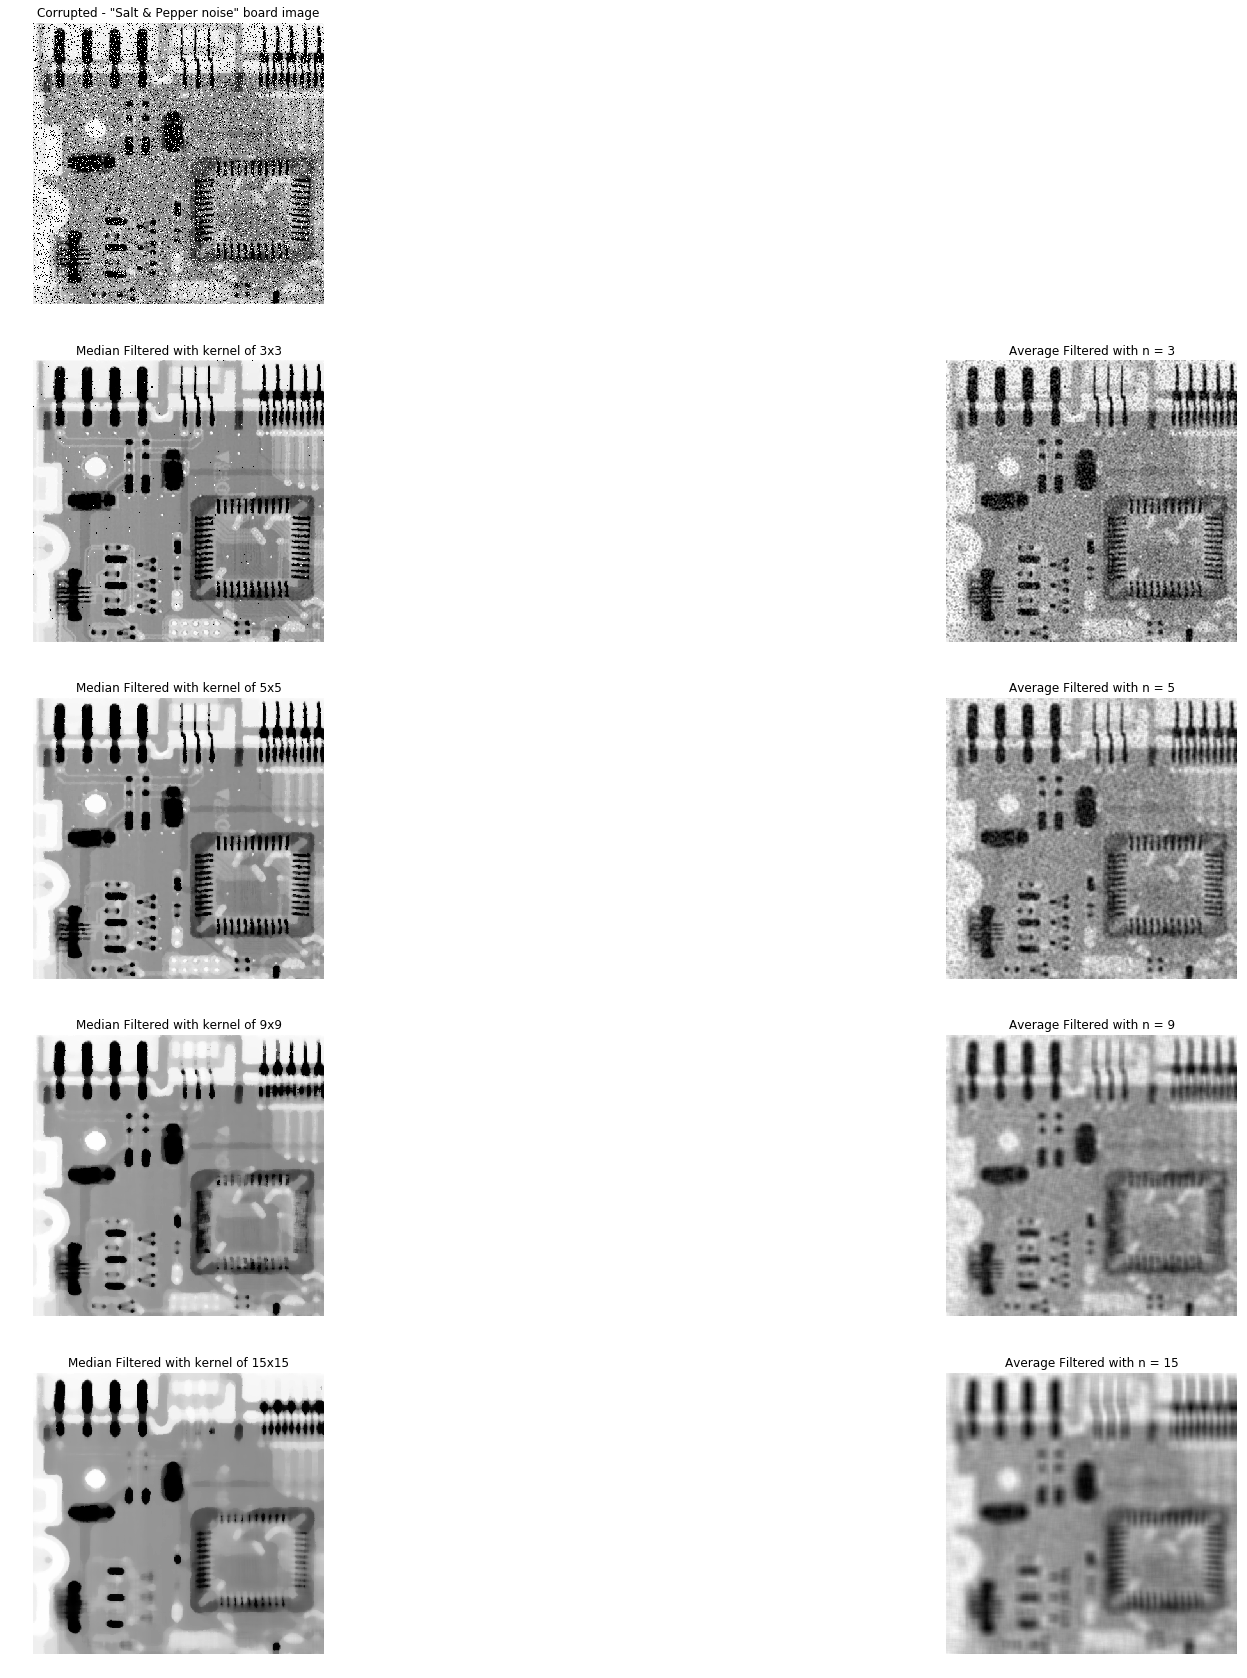

In [201]:
img4 = cv2.imread("ckt_board_saltpep_prob_pt05.png", cv2.IMREAD_GRAYSCALE)
def filterK(img,k):
    # Se utilizó la función filterK para implementar el filtro mediano y devolver la imagen filtrada.
    imgM = cv2.medianBlur(img,k); 
    #La función cv2.medianBlur retorna la imagen filtrada con un median filter,
    #ingresando la imagen a filtrar y el tamaño del kernel.
    return imgM
plt.figure(figsize=(30,30));plt.subplot(5,2,1);plt.imshow(img4, cmap='gray'); plt.title('Corrupted - "Salt & Pepper noise" board image')
plt.axis("off")

kk=3
for ki in range(1,5):
    plt.subplot(5,2,ki*2+1),plt.imshow(filterK(img4,kk), cmap='gray'), plt.title('Median Filtered with kernel of '+ str(kk)+"x"+ str(kk)),plt.axis("off")
    plt.subplot(5,2,ki*2+2),plt.imshow(smooth(img4,kk), cmap='gray'), plt.title('Average Filtered with n = '+ str(kk)),plt.axis("off");
    kk = kk + ki*2                                                            


### Análisis
<p> El filtro utilizado en la función logra reducir el ruido de forma satisfactioria dependiendo del tamaño del kernel, pero este a su vez reduce la calidad de los detalles de la imagen. En la imagen del kernel de 3x3 se pueden apreciar bastante bien los detalles de la imagen a pesar de que permanece un poco de ruido. En la siguiente del kernel de 5x5 ya casi no se aprecia el ruido, pero los detalles de la imagen empiezan a verse borrosos. En la tercera, kernel de 9x9 se eliminó por completo el ruido pero ahora los detalles de la imagen se empiezan a perder. Por último, en el kernel de 15x15 la imagen se ve un poco borrosa y los detalles no se aprecian tan bien.</p>
<p><b>Comparación con Average: </b>Este filtro inicialmente no logra eliminar el ruido de manera significativa, con un n=15 se deja de apreciar el ruido pero en este punto, ya no se pueden ver bien los detalles de la imagen mientras que con Median sí.</p>

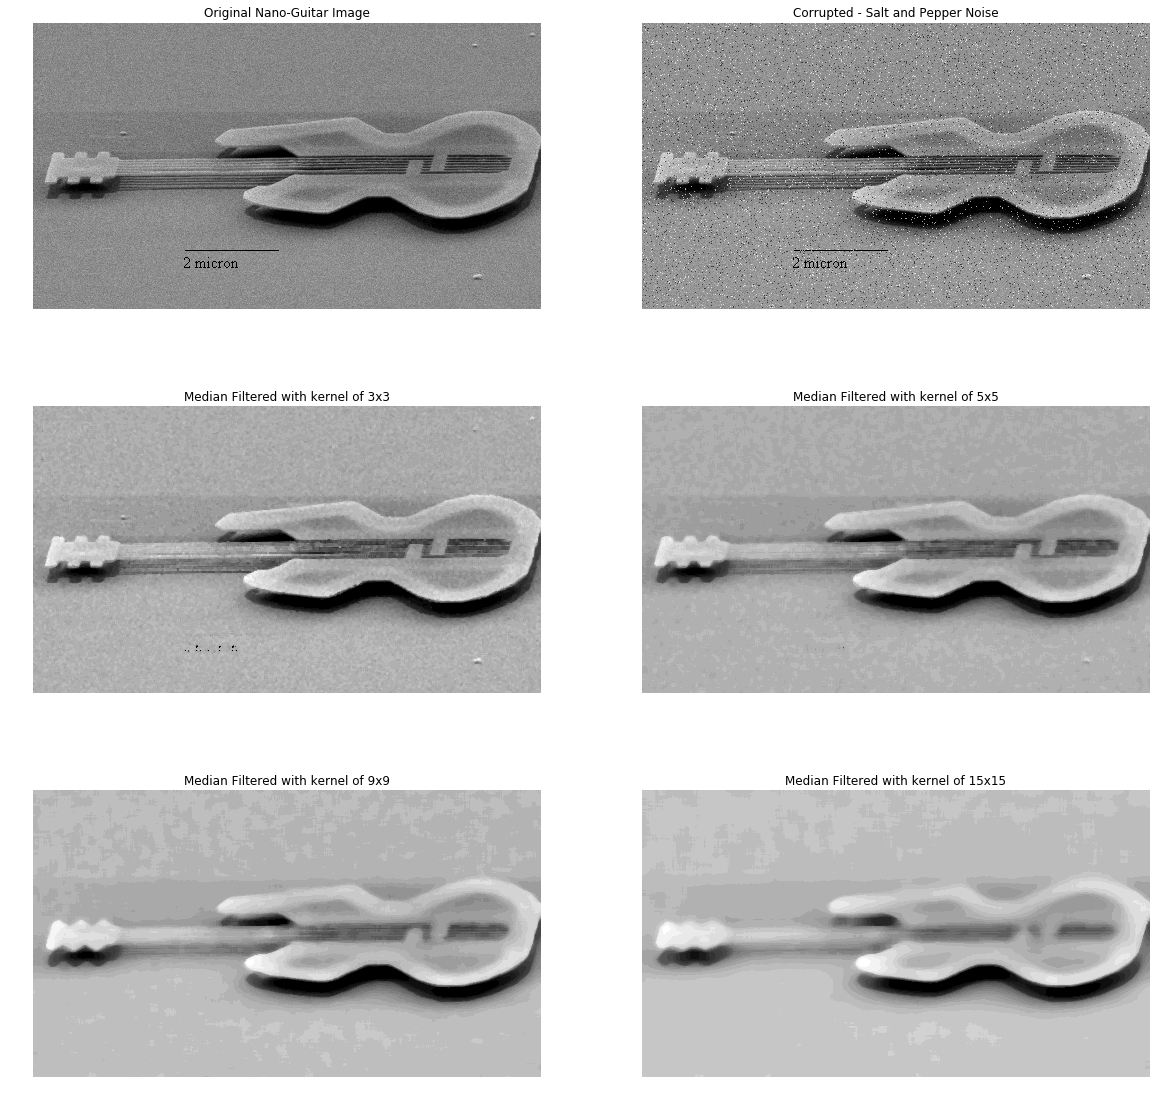

In [197]:
#Función para generar imagen con ruido Salt & Pepper
def noisy(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.04
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in image.shape]
    out[coords] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in image.shape]
    out[coords] = 0
    return out

#Prueba con imagen de nano-guitarra con ruido    
imgo4 = cv2.imread("nanoguitar.png")
imgn = noisy(imgo4)
img4 = cv2.cvtColor(imgn, cv2.COLOR_BGR2GRAY) 
cv2.imwrite("nanonoisy.png",img4)
plt.figure(figsize=(20,20));plt.subplot(3,2,1);plt.imshow(imgo4, cmap='gray'); plt.title('Original Nano-Guitar Image')
plt.axis("off")
plt.subplot(3,2,2);plt.imshow(img4, cmap='gray'); plt.title('Corrupted - Salt and Pepper Noise')
plt.axis("off")

kk=3
for ki in range(1,5):
    plt.subplot(3,2,ki+2),plt.imshow(filterK(img4,kk), cmap='gray'), plt.title('Median Filtered with kernel of '+ str(kk)+"x"+ str(kk)),plt.axis("off")
    kk = kk + ki*2
    
    
    

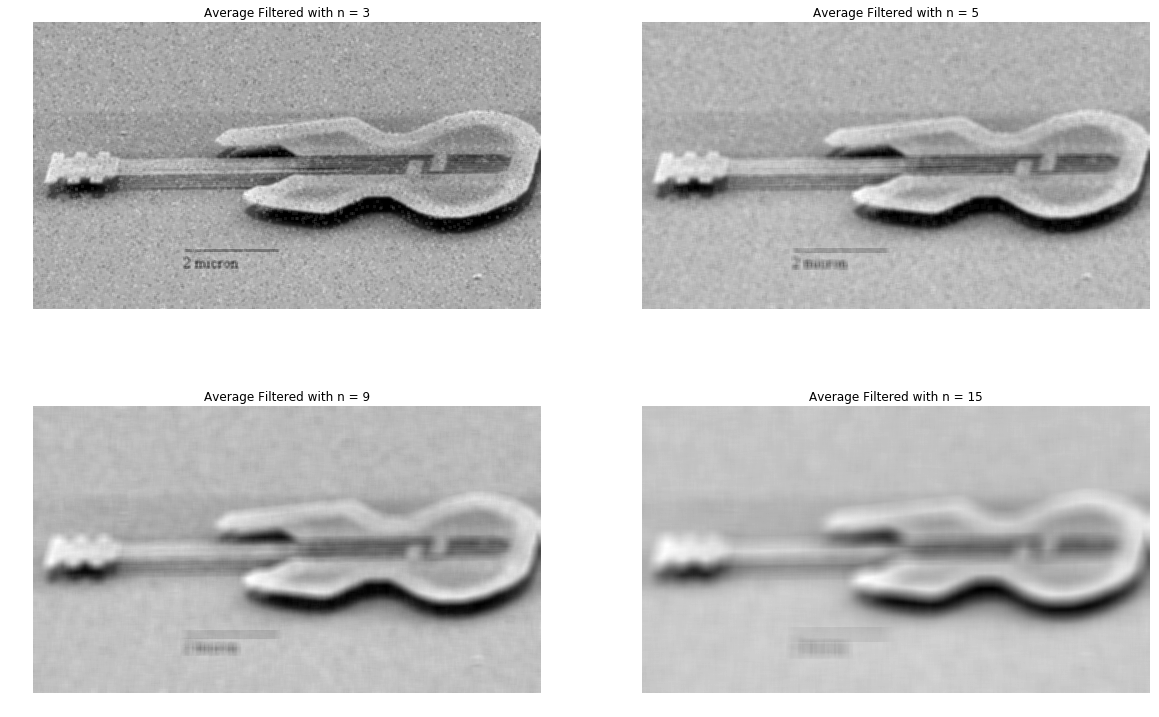

In [200]:
#Nano-guitarra con filtro Average.
kk=3
plt.figure(figsize=(20,20));
for ki in range(1,5):
    plt.subplot(3,2,ki),plt.imshow(smooth(img4,kk), cmap='gray'), plt.title('Average Filtered with n = '+ str(kk)),plt.axis("off")
    kk = kk + ki*2

### Análisis
<p><b>Nano-Guitar: </b>La imagen se logra recuperar de forma aceptable con el kernel de 3x3, excepto por las letras, que se perdieron prácticamente por completo debido al ruido. Los detalles de las cuerdas no se recuperaron bien de la imagen original.</p>
<p><b>Comparación con Average: </b>En este caso el filtro suaviza el ruido pero sin lograr eliminarlo por completo, pero a diferencia de Median, este logra conservar el texto de la imagen ya que el filtro Median confunde estos detalles tan pequeños con el ruido de la imagen y al final lo elimina por completo.</p>

### Problem 5 

`1. Write a function that sharpens an image using the Laplacian kernel. Your function should first compute the Laplacian of the input image using the following kernel:
<table>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>-4</td>
<td>1</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
</table>

2. Visualize the Laplacian of the input image. You may consider using a power intensity transformation to enhance the Laplacian image for visualization.

3. Recall that sharpening is achieved by subtraction: $g(x,y) = f(x,y) - \nabla^2 f(x,y) $. Use this method to produce an enhanced image.

4. Recall that subtraction and filtering with a kernel are linear operations. Therefore, it is possible to combine both operations into a single kernel:
<table>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
<tr>
<td>-1</td>
<td> 5</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
</table>
Write another function that directly sharpens the image using this single kernel.

5. Finally, recall that there is an alternative kernel that can be used to compute a Laplacian: 
<table>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td> -8</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>
Write another function that produces a sharpened image using a single enhancement kernel that is based on this alternative definition of the Laplacian.

Apply all the functions you wrote to the image <tt>blurry_moon.png</tt>. Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.

Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.


## Problem 6

The gradient of an image is the two-dimensional vector

$\nabla \mathbf{f} = \left[ \begin{array}{c}G_x\\G_y\end{array} \right] 
=\left[ \begin{array}{c}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y} \end{array} \right]
$

1. Write a function that calculates the image gradients in the $x$ and $y$ directions. Use the following Sobel operators to compute the derivatives:
<table>
<tr>
<td>-1</td>
<td>-2</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>2</td>
<td>1</td>
</tr>
</table>
<table>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>-2</td>
<td>0</td>
<td>2</td>
</tr>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
</table>
The function should output two variables, $G_x$ and $G_y$, which correspond to the derivatives in the $x$ and $y$ directions. Visualize the resulting gradients. Analyze the results obtained. How can you interpret the gradient operators?

2. Write another function that computes the gradient magnitude of an image. Recall that the magnitude of the gradient vector can be computed by:<br>
$\nabla f = \text{mag}(\nabla \mathbf{f}) = \left[ G_x^2 + G_y^2 \right]^\frac{1}{2}$.

3. Write another function that computes an approximation of the gradient magnitude using the following equation: <br>
$\nabla f \approx |G_x| + |G_y|$. <br>
Visualize and compare the resulting gradient magnitudes computed using both methods. How can you interpret the gradient magnitude?

You may use the images <tt>contact_lens_original.png</tt> and <tt>face.png<tt> to test your algorithms.


(Discuss your results after looking at the resulting images) Analyze the results you obtained.How can you interpret the gradient operators? How can you interpret the gradient magnitude?